<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [ ]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(len(Data_X))
print(len(Train_X))
print(len(Vald_X))
print(len(Test_X))
 
print(Data_X.shape)
print(Data_Y.shape)

22950
9180
6884
6886
(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4991, 50)       1050      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 1247, 50)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 3, 1238, 50)       50050     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 3, 309, 50)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 300, 50)        25050     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 3, 75, 50)         0     

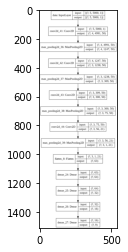

In [18]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 50, kernel_size = (2, 10),strides=(1, 1), activation = "relu") (inputs)
x = layers.MaxPooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50, kernel_size = (2,10),strides = (1, 1),padding = 'valid', activation='relu') (x)
x = layers.MaxPooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
x = layers.MaxPooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (x)
#block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
#x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
#block_2_output = layers.add([x, block_1_output])
 

#x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
#block_3_output = layers.add([x, block_2_output])


#x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)

#block_6_output = layers.add([x, block_3_output])
 
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
#block_7_output = layers.add([x, block_6_output])

#x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 

x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu")(x)
x = layers.MaxPooling2D(pool_size = (1,48))(x)
x = layers.Flatten()(x)


x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [19]:
history = model.fit(Train_X, Train_Y, epochs=200,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/200
46/46 - 7s - loss: 1.3046 - accuracy: 0.4461 - val_loss: 0.7512 - val_accuracy: 0.5738
Epoch 2/200
46/46 - 6s - loss: 0.5941 - accuracy: 0.6670 - val_loss: 0.5698 - val_accuracy: 0.7060
Epoch 3/200
46/46 - 6s - loss: 0.4965 - accuracy: 0.7216 - val_loss: 0.4656 - val_accuracy: 0.7391
Epoch 4/200
46/46 - 6s - loss: 0.4589 - accuracy: 0.7430 - val_loss: 0.4658 - val_accuracy: 0.7615
Epoch 5/200
46/46 - 6s - loss: 0.4517 - accuracy: 0.7553 - val_loss: 0.4605 - val_accuracy: 0.7314
Epoch 6/200
46/46 - 6s - loss: 0.4508 - accuracy: 0.7466 - val_loss: 0.4442 - val_accuracy: 0.7674
Epoch 7/200
46/46 - 6s - loss: 0.4205 - accuracy: 0.7700 - val_loss: 0.4852 - val_accuracy: 0.7339
Epoch 8/200
46/46 - 6s - loss: 0.4196 - accuracy: 0.7749 - val_loss: 0.4119 - val_accuracy: 0.7926
Epoch 9/200
46/46 - 6s - loss: 0.3985 - accuracy: 0.7874 - val_loss: 0.4476 - val_accuracy: 0.7734
Epoch 10/200
46/46 - 6s - loss: 0.3975 - accuracy: 0.7946 - val_loss: 0.3862 - val_accuracy: 0.8026
Epoch 11/

In [20]:
#Test_X,Test_Y = prepare_test_data()
Test_Y_1 = Test_Y
Test_Y = to_categorical(Test_Y)
print(Test_X.shape)
print(Test_Y.shape)

(6886, 5, 5000, 1)
(6886, 9, 2)


In [21]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Testing ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
#print (model.predict(Test_X))
#print (Test_Y_1.astype('int'))
print ('true     ',Train_Y.astype('int'))    
print ('predicted', model.predict(Train_X))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.058285005390644073, 0.9649237394332886]
true      [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
predicted [[1.79361557e-08 1.55886926e-09 4.38322045e-09 ... 1.58690181e-08
  9.99768674e-01 2.12315873e-10]
 [9.37035960e-09 5.31970601e-09 1.84941502e-08 ... 1.86560186e-07
  9.87235844e-01 9.84147985e-10]
 [2.85351387e-12 1.10016614e-18 2.45375687e-13 ... 1.20785867e-10
  2.90824461e-17 1.72214509e-09]
 ...
 [2.02588970e-14 2.56646700e-13 2.41291431e-09 ... 9.99944210e-01
  5.52479687e-05 4.68471683e-07]
 [4.22836571e-10 2.80194840e-13 1.87313186e-11 ... 9.99657273e-01
  6.74304985e-08 3.42627725e-04]
 [1.36553193e-12 6.24888097e-09 1.23863315e-11 ... 1.45409621e-14
  1.96550013e-06 9.72309730e-14]]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


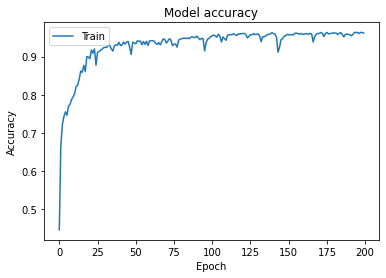

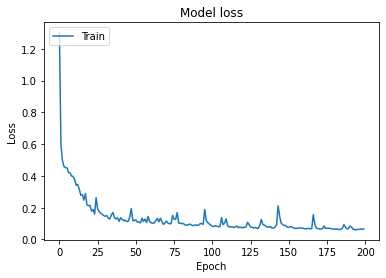

In [22]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]